In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from ste import STE

In [2]:
# Set default setting for the figures.
plt.style.use("default") # style matplotlib
plt.rc("axes", labelsize = 12) # fontsize of the x and y labels
plt.rc("axes", titlesize = 15) # fontsize of the axes title
plt.rc("xtick", labelsize = 12) # fontsize of the tick labels
plt.rc("ytick", labelsize = 12) # fontsize of the tick labels
plt.rc("legend", fontsize = 12) # legend fontsize

In [3]:
# Add the python path to the folder containing some custom packages.
import sys
sys.path.insert(0, "../packages/")
from TsIP.TsIP import TsIP

# Time-series dataset

In [4]:
# Define the country name.
COUNTRY = "Yemen"

In [5]:
# Load the time-series.
df = pd.read_csv(f"../Dataset time-series/output_data/{COUNTRY}/{COUNTRY}-day.csv", header = [0, 1], index_col = 0)
# Not consider some indicators.
df.drop(["Code", "Lat", "Lon", "Ramadan", "Population"], axis = 1, level = "Indicator", inplace = True)
df.index.name = "Datetime"
df.index = pd.to_datetime(df.index)
freq = "D"
df.index.freq = freq
df.head()

AdminStrata                       Adamawa                                 \
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
Datetime                                                                   
2019-06-30                     101.837038                     102.942884   
2019-07-01                     101.745991                     102.802374   
2019-07-02                     101.651256                     102.667455   
2019-07-03                     101.552834                     102.538126   
2019-07-04                     101.450723                     102.414388   

AdminStrata                                                             \
Indicator         FCG Fatalities      NDVI NDVI Anomaly Rainfalls (mm)   
Datetime                                                                 
2019-06-30   26.79795        0.0  0.698378   104.961832       514.7136   
2019-07-01   27.08333        0.0  0.700721   104.874987       520.9204   
2019-07-02   25.39063        0.0  0.703054   104.788066       527.1272   
2019-07-03   24.86611        0.0  0.705376   104.701069       533.3340   
2019-07-04   24.41773        0.0  0.707687   104.613995       539.5408   

AdminStrata                                 Central  \
Indicator        rCSI 1 Month Anomaly Rainfalls (%)   
Datetime                                              
2019-06-30   16.43836                     94.105788   
2019-07-01   17.00000                     93.430054   
2019-07-02   15.93750                     92.797532   
2019-07-03   15.60826                     92.208223   
2019-07-04   15.32682                     91.662127   

AdminStrata                                 ...     South-West            \
Indicator   3 Months Anomaly Rainfalls (%)  ... Rainfalls (mm)      rCSI   
Datetime                                    ...                            
2019-06-30                      103.036325  ...       250.1330  57.68452   
2019-07-01                      102.645889  ...       261.6982  56.56940   
2019-07-02                      102.271692  ...       273.2634  57.57078   
2019-07-03                      101.913731  ...       284.8286  54.00416   
2019-07-04                      101.572009  ...       296.3938  54.08571   

AdminStrata                          West                                 \
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)   
Datetime                                                                   
2019-06-30                      98.404472                     114.494632   
2019-07-01                      97.784255                     113.824392   
2019-07-02                      97.234921                     113.185486   
2019-07-03                      96.756472                     112.577914   
2019-07-04                      96.348907                     112.001678   

AdminStrata                                                             \
Indicator         FCG Fatalities      NDVI NDVI Anomaly Rainfalls (mm)   
Datetime                                                                 
2019-06-30   39.07455        1.0  0.733825   103.350519       478.4319   
2019-07-01   37.46919        1.0  0.735867   103.274955       489.1485   
2019-07-02   37.77065        1.0  0.737881   103.199658       499.8651   
2019-07-03   38.15074        1.0  0.739869   103.124628       510.5817   
2019-07-04   37.79831        1.0  0.741830   103.049865       521.2983   

AdminStrata            
Indicator        rCSI  
Datetime               
2019-06-30   20.90831  
2019-07-01   20.04930  
2019-07-02   19.56696  
2019-07-03   20.51282  
2019-07-04   20.32333  

[5 rows x 80 columns]

In [6]:
len(df)

531

In [7]:
PROVINCES = df.columns.get_level_values("AdminStrata").unique()
PROVINCES

Index(['Adamawa', 'Central', 'East', 'Far-North', 'Littoral', 'North',
       'North-West', 'South', 'South-West', 'West'],
      dtype='object', name='AdminStrata')

In [8]:
INDICATORS = df.columns.get_level_values("Indicator").unique()
INDICATORS

Index(['1 Month Anomaly Rainfalls (%)', '3 Months Anomaly Rainfalls (%)',
       'FCG', 'Fatalities', 'NDVI', 'NDVI Anomaly', 'Rainfalls (mm)', 'rCSI'],
      dtype='object', name='Indicator')

In [9]:
# Plot time-series.
#TsIP(df).interactive_plot_df(title = "Time-series", matplotlib = False, style = "lines", comparison = False, normalization = True)

In [10]:
# Assign a color to each indicator.
cols = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
        (1.0, 0.4980392156862745, 0.054901960784313725),
        (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
        (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
        (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
        (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
        (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
        (0.09019607843137255, 0.7450980392156863, 0.8117647058823529), 
        (1.0, 1.0, 0.2), 
        (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

colors = dict()
for i, indicator in enumerate(reversed(INDICATORS)):
    colors[indicator] = cols[i]

## Compute the entropy rate

In [11]:
# Compute the entropy rate of the endogenous indicators (FCS indicator).
ks = 15

def history_length_Y(serie):
    adminstrata = serie.name[0]
    y = list()
    for k in range(ks):
        result = STE.entropy_rate(serie, m = 3, k = k+1, h = 1)
        y.append(result)  
    return y  

tqdm.pandas()
df_Y = df.xs("FCG", axis = 1, level = 1, drop_level = False).progress_apply(history_length_Y)
df_Y.index = df_Y.index  + 1
df_Y.head()

AdminStrata,Adamawa,Central,East,Far-North,Littoral,North,North-West,South,South-West,West
Indicator,FCG,FCG,FCG,FCG,FCG,FCG,FCG,FCG,FCG,FCG
1,1.319953,1.258200,1.252976,1.269882,1.334776,1.321679,1.422409,1.122705,1.408382,1.239796
2,1.256467,1.194399,1.196604,1.215964,1.284912,1.262237,1.380815,1.004512,1.377121,1.202393
3,1.148930,1.067241,1.099686,1.126442,1.171619,1.194311,1.263341,0.887397,1.285066,1.085489
4,0.988269,0.931385,0.897310,0.942368,0.946235,0.975152,1.000965,0.670537,1.007003,0.923798
5,0.761404,0.727859,0.701365,0.686330,0.702772,0.679618,0.667435,0.447164,0.700561,0.679944


In [12]:
def plot_quantiles(df, title = None, xaxis = None, yaxis = None, label = None):
    # Define the subplot figure.
    fig, axs = plt.subplots(figsize = (10, 5))
    value_statistic = df.agg([lambda x: x.quantile(0.25), np.mean, lambda x: x.quantile(0.75)], axis = 1)
    value_statistic.columns = ["lower_quantile", "mean", "upper_quantile"]
    # Plot.
    value_statistic["mean"].plot(style = ".-", label = label, ax = axs, ms = 12, c = "red")
    axs.fill_between(x = value_statistic["mean"].index, y1 = value_statistic["lower_quantile"], 
                     y2 = value_statistic["upper_quantile"], color = "red", alpha = 0.3)
    # Set attributes of the plot.
    axs.set_title(title)
    axs.legend(loc = "best", prop = {"size": 15})
    axs.set_xlabel(xaxis, fontsize = 18)
    axs.set_ylabel(yaxis, fontsize = 18)
    axs.tick_params(labelsize = 15)
    axs.set_xticks(np.arange(1, 16))
        
    return fig, axs

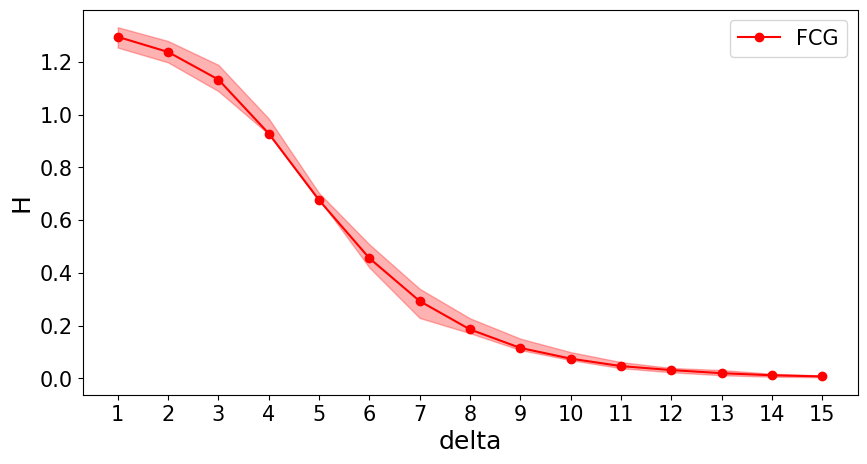

In [13]:
fig, axs = plot_quantiles(df_Y, xaxis = "delta", yaxis = "H", label = "FCG")

## Compute the STE

In [14]:
df_STE_deltas = pd.read_csv(f"./output/STE_{COUNTRY}.csv", index_col = 0, header = [0, 1, 2])
df_STE_deltas.head()

AdminStrata                       Adamawa                                      \
Indicator   1 Month Anomaly Rainfalls (%)                                       
                             original_STE shuffle_STE effective_STE       REA   
Delta                                                                           
1                                0.062097    0.096374     -0.034277 -0.025968   
2                                0.124668    0.233528     -0.108860 -0.048347   
3                                0.094227    0.237170     -0.142943 -0.063381   
4                                0.088563    0.239617     -0.151055 -0.067047   
5                                0.118021    0.241879     -0.123858 -0.054866   

AdminStrata                                                           \
Indicator   3 Months Anomaly Rainfalls (%)                             
                              original_STE shuffle_STE effective_STE   
Delta                                                                  
1                                 0.042883    0.092135     -0.049252   
2                                 0.124321    0.228447     -0.104126   
3                                 0.082749    0.232020     -0.149271   
4                                 0.079549    0.237476     -0.157926   
5                                 0.093043    0.239684     -0.146640   

AdminStrata                                     ...          West            \
Indicator               Fatalities              ...  NDVI Anomaly             
                  REA original_STE shuffle_STE  ... effective_STE       REA   
Delta                                           ...                           
1           -0.037314     0.005792    0.071655  ...     -0.045554 -0.036743   
2           -0.046245     0.008745    0.177253  ...     -0.134416 -0.062379   
3           -0.066187     0.008418    0.170676  ...     -0.120159 -0.055779   
4           -0.070097     0.014613    0.180622  ...     -0.139044 -0.064269   
5           -0.064958     0.010292    0.179637  ...     -0.131131 -0.060705   

AdminStrata                                                                  \
Indicator   Rainfalls (mm)                                             rCSI   
              original_STE shuffle_STE effective_STE       REA original_STE   
Delta                                                                         
1                 0.032203    0.099570     -0.067366 -0.054337     0.096924   
2                 0.087527    0.234958     -0.147431 -0.068419     0.192763   
3                 0.088657    0.227157     -0.138500 -0.064293     0.220429   
4                 0.097032    0.226376     -0.129344 -0.059785     0.246397   
5                 0.095279    0.230128     -0.134849 -0.062426     0.242388   

AdminStrata                                      
Indicator                                        
            shuffle_STE effective_STE       REA  
Delta                                            
1              0.095091      0.001833  0.001479  
2              0.225767     -0.033004 -0.015316  
3              0.225032     -0.004604 -0.002137  
4              0.227442      0.018955  0.008761  
5              0.238436      0.003952  0.001830  

[5 rows x 280 columns]

In [15]:
def compute_importance(x):
    idx = x.xs("REA", axis = 1, level = 2).idxmax()
    return x.xs("REA", axis = 1, level = 2).loc[idx].values.ravel()[0]
    
T_fcs = df_STE_deltas.groupby(axis = 1, level = ["AdminStrata", "Indicator"], group_keys = False).apply(compute_importance).unstack("Indicator")

In [16]:
T_fcs_perc = T_fcs*100
T_fcs_perc[T_fcs_perc < 0] = 0

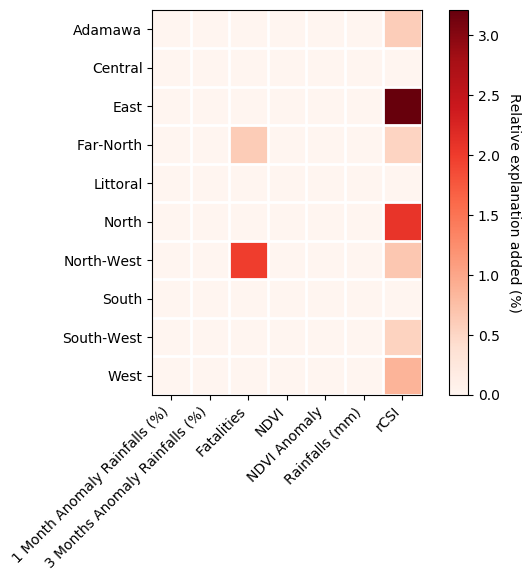

In [17]:
fig, ax = plt.subplots(figsize = (7, 5))
im = ax.imshow(T_fcs_perc, cmap = "Reds")
cbar = fig.colorbar(im, ax = ax)
cbar.set_label("Relative explanation added (%)", rotation = 270, labelpad = 15)

ax.set_xticks(range(len(T_fcs_perc.columns)))
ax.set_yticks(range(len(T_fcs_perc.index)))
ax.set_xticklabels(T_fcs.columns, rotation = 45)
ax.set_yticklabels(T_fcs.index)

for i in range(T_fcs_perc.shape[0]):
    ax.axhline(i + 0.5, color = "white", lw = 2)
for i in range(T_fcs_perc.shape[1]):
    ax.axvline(i + 0.5, color = "white", lw = 2)

plt.xticks(rotation = 45, ha = "right");

# Save the figure.
fig.savefig(f"./output/images/Importance_{COUNTRY}.png", bbox_inches = "tight", dpi = 300)

In [18]:
def compute_best_delta(x):
    idx = x.xs("REA", axis = 1, level = 2).idxmax().values[0]
    return idx
    
best_delta = df_STE_deltas.groupby(axis = 1, level = ["AdminStrata", "Indicator"], group_keys = False).apply(compute_best_delta).unstack("Indicator")

In [19]:
best_delta = best_delta.median().to_dict()
best_delta

{'1 Month Anomaly Rainfalls (%)': 1.0,
 '3 Months Anomaly Rainfalls (%)': 1.0,
 'Fatalities': 1.0,
 'NDVI': 1.0,
 'NDVI Anomaly': 1.0,
 'Rainfalls (mm)': 1.0,
 'rCSI': 3.5}

In [20]:
with open(f"./output/best_deltas_{COUNTRY}.txt", 'w') as f:
    print(best_delta, file = f)

In [21]:
T_fcs_rank = T_fcs.transpose().rank(method = "max", ascending = False).transpose()
T_fcs_rank.head()

Indicator,1 Month Anomaly Rainfalls (%),3 Months Anomaly Rainfalls (%),Fatalities,NDVI,NDVI Anomaly,Rainfalls (mm),rCSI
AdminStrata,,,,,,,
Adamawa,3.0,6.0,7.0,5.0,4.0,2.0,1.0
Central,4.0,2.0,7.0,6.0,5.0,3.0,1.0
East,4.0,5.0,7.0,2.0,6.0,3.0,1.0
Far-North,3.0,6.0,1.0,4.0,5.0,7.0,2.0
Littoral,4.0,6.0,5.0,1.0,7.0,2.0,3.0


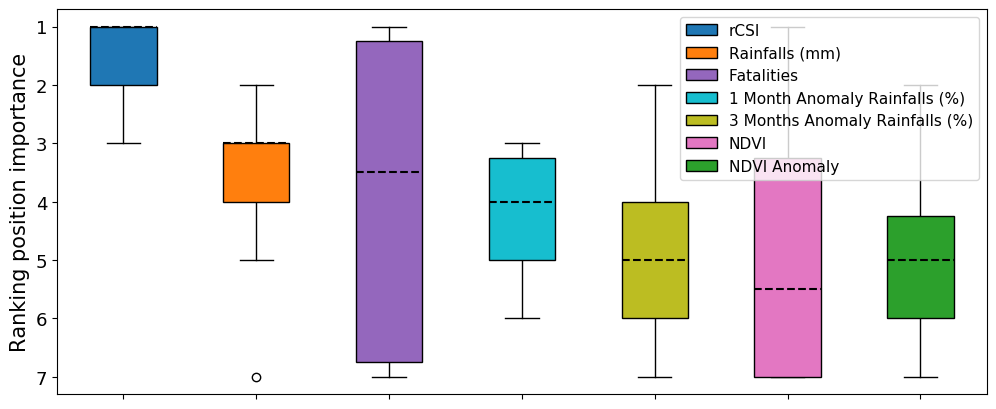

In [22]:
fig, ax = plt.subplots(figsize = (12, 5))
T_fcs_rank = T_fcs_rank.astype(int)
meds = T_fcs_rank.mean()
meds.sort_values(ascending = True, inplace = True)
T_fcs_rank_sort = T_fcs_rank[meds.index]

bplot = ax.boxplot(T_fcs_rank_sort.T, patch_artist = True, medianprops = {"linestyle": "--", "linewidth": 1.5, "color": "black"}) 
# Fill with colors.
legends = list()
for patch, indicator in zip(bplot["boxes"], T_fcs_rank_sort.columns):
    patch.set_facecolor(colors[indicator])
    patch.set_label(indicator)
    legends.append(patch)

ax.invert_yaxis()
#ax.set_xlabel("Indicator")
ax.set_ylabel("Ranking position importance", fontsize = 15)
ax.tick_params(labelsize = 13)
ax.set_xticklabels([""]*len(T_fcs_rank_sort.columns), rotation = 0, fontsize = 15)  

ax.legend(legends, T_fcs_rank_sort.columns, loc = "upper right", prop = {"size": 11})

# Save the figure.
fig.savefig(f"./output/images/Ranking_{COUNTRY}.png", bbox_inches = "tight", dpi = 300)